# Сергей Зотов AIN-2-22 Лабораторная работа №5

## Примеры

#### Построение моделей классификации и регрессии
При построении модели возможны варианты:
•	Переобучение (модель подстраивается под новые данные)
•	Недообучение (модель плохо работает даже на обучающем наборе)
•	Оптимальная точка (дает наилучшую обобщающую способность)


<img src='complexity_and_correctness_of_the_model.png' width='800'>

In [4]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
import mglearn
import mglearn.datasets

Text(0, 0.5, 'Целевая переменная')

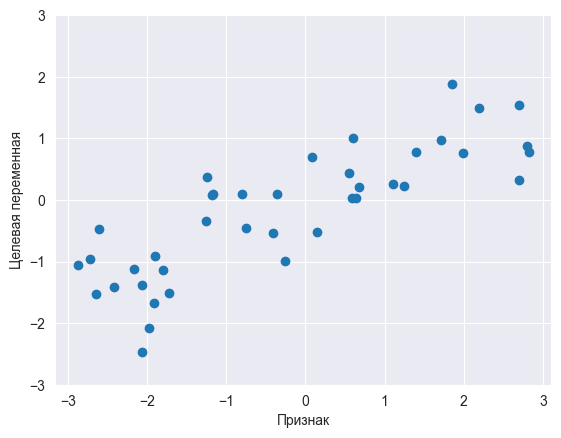

In [5]:
x, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(x, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("Признак")
plt.ylabel("Целевая переменная")

#### Датасет (load_breast_cancer)

In [6]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("Ключи cancer(): \n{}".format(cancer.keys()))


Ключи cancer(): 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [7]:
print("Форма массива data для набора cancer: {}".format(cancer.data.shape))

print("Количество примеров для каждого класса:\n{}".format(
    {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}
))

Форма массива data для набора cancer: (569, 30)
Количество примеров для каждого класса:
{np.str_('malignant'): np.int64(212), np.str_('benign'): np.int64(357)}


In [8]:
print("Имена признаков:\n{}".format(cancer.feature_names))


Имена признаков:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


#### Датасет (load_boston)

In [9]:
from sklearn.datasets import load_boston
boston = load_boston()
print("Форма массива data для набора boston: {}".format(boston.data.shape))


ImportError: 
`load_boston` has been removed from scikit-learn since version 1.2.

The Boston housing prices dataset has an ethical problem: as
investigated in [1], the authors of this dataset engineered a
non-invertible variable "B" assuming that racial self-segregation had a
positive impact on house prices [2]. Furthermore the goal of the
research that led to the creation of this dataset was to study the
impact of air quality but it did not give adequate demonstration of the
validity of this assumption.

The scikit-learn maintainers therefore strongly discourage the use of
this dataset unless the purpose of the code is to study and educate
about ethical issues in data science and machine learning.

In this special case, you can fetch the dataset from the original
source::

    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]

Alternative datasets include the California housing dataset and the
Ames housing dataset. You can load the datasets as follows::

    from sklearn.datasets import fetch_california_housing
    housing = fetch_california_housing()

for the California housing dataset and::

    from sklearn.datasets import fetch_openml
    housing = fetch_openml(name="house_prices", as_frame=True)

for the Ames housing dataset.

[1] M Carlisle.
"Racist data destruction?"
<https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8>

[2] Harrison Jr, David, and Daniel L. Rubinfeld.
"Hedonic housing prices and the demand for clean air."
Journal of environmental economics and management 5.1 (1978): 81-102.
<https://www.researchgate.net/publication/4974606_Hedonic_housing_prices_and_the_demand_for_clean_air>


In [11]:
x, y = mglearn.datasets.load_extended_boston()
print("Форма массива x: {}".format(x.shape))

Форма массива x: (506, 104)


#### Метод k-ближайших соседей

Форма массива X: (26, 2)


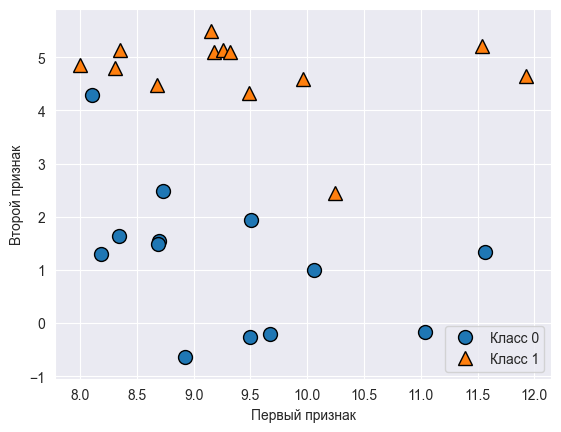

In [12]:
# генерируем набор данных
X, y = mglearn.datasets.make_forge()

# строим график для набора данных
%matplotlib inline
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Класс 0", "Класс 1"], loc=4)
plt.xlabel("Первый признак")
plt.ylabel("Второй признак")
print("Форма массива X: {}".format(X.shape))


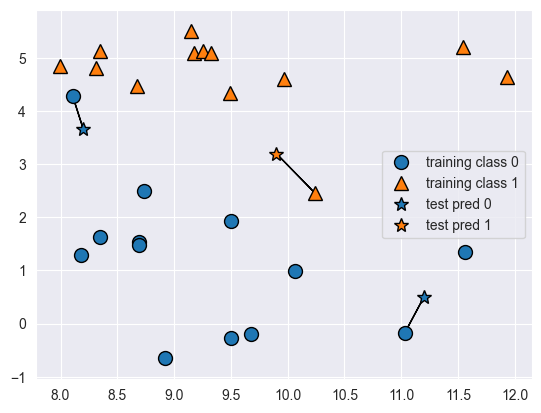

In [13]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

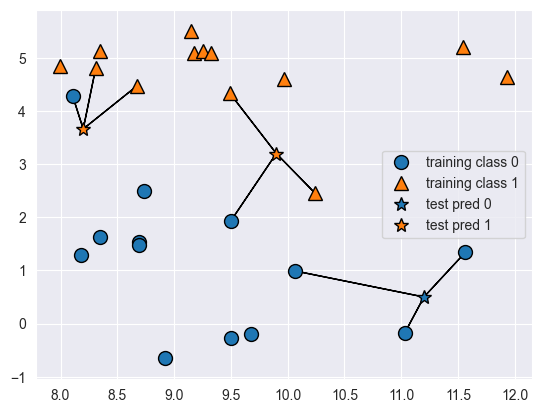

In [14]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [15]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [16]:
print("Прогноз на тестовом наборе: {}".format(clf.predict(X_test)))

Прогноз на тестовом наборе: [1 0 1 0 1 0 0]


In [17]:
print("Правильность на тестовом наборе: {:.2f}".format(clf.score(X_test, y_test)))

Правильность на тестовом наборе: 0.86


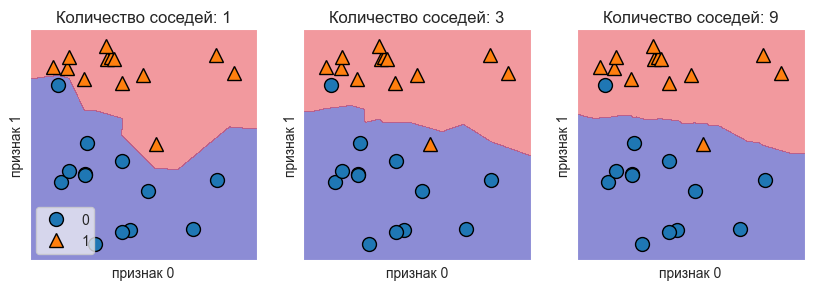

In [18]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    # создаем объект-классификатор и подгоняем в одной строке
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("Количество соседей: {}".format(n_neighbors))
    ax.set_xlabel("признак 0")
    ax.set_ylabel("признак 1")

axes[0].legend(loc=3)


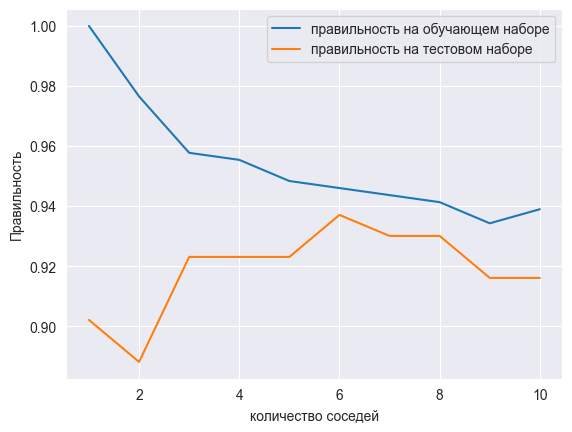

In [19]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
 cancer.data, cancer.target, stratify=cancer.target, random_state=66)
training_accuracy = []
test_accuracy = []
# пробуем n_neighbors от 1 до 10
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
 # строим модель
 clf = KNeighborsClassifier(n_neighbors=n_neighbors)
 clf.fit(X_train, y_train)
 # записываем правильность на обучающем наборе
 training_accuracy.append(clf.score(X_train, y_train))
 # записываем правильность на тестовом наборе
 test_accuracy.append(clf.score(X_test, y_test))
plt.plot(neighbors_settings, training_accuracy, label="правильность на обучающем наборе")
plt.plot(neighbors_settings, test_accuracy, label="правильность на тестовом наборе")
plt.ylabel("Правильность")
plt.xlabel("количество соседей")
plt.legend()


#### Регрессия ближайших соседей

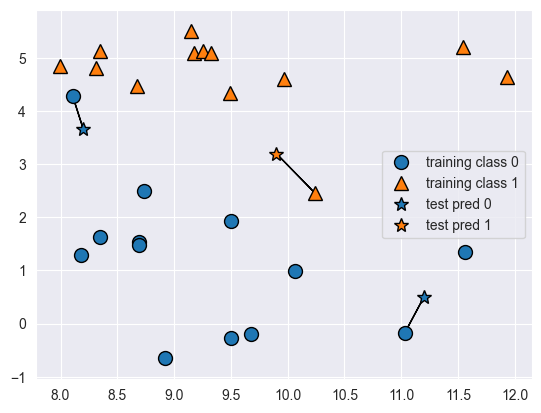

In [20]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

In [21]:
from sklearn.neighbors import KNeighborsRegressor
X, y = mglearn.datasets.make_wave(n_samples=40)

# Разбиваем набор данных wave на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Создаем экземпляр модели и устанавливаем количество соседей равным 3
reg = KNeighborsRegressor(n_neighbors=3)

# Подгоняем модель с использованием обучающих данных и обучающих ответов
reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [22]:
print("Прогнозы для тестового набора:\n{}".format(reg.predict(X_test)))

Прогнозы для тестового набора:
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [23]:
print("R^2 на тестовом наборе: {:.2f}".format(reg.score(X_test, y_test)))

R^2 на тестовом наборе: 0.83


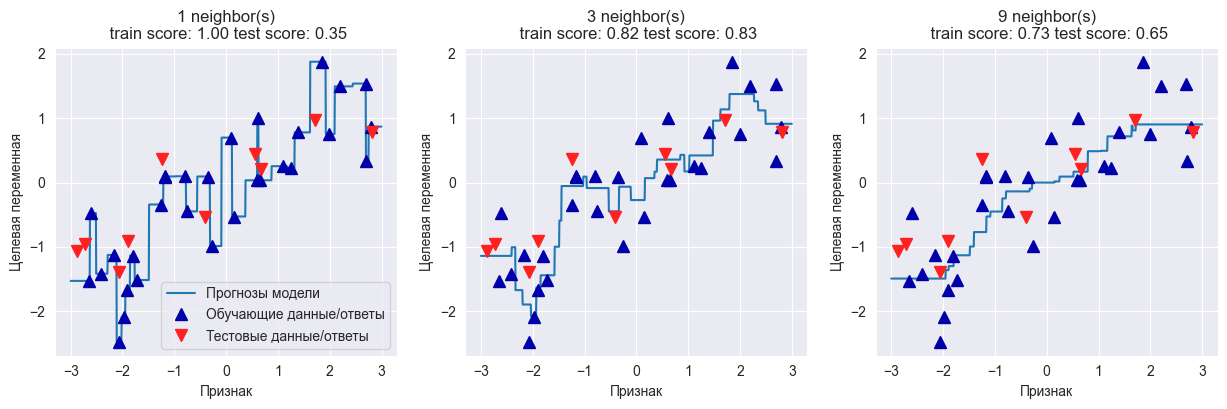

In [24]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# создаем 1000 точек данных, равномерно распределенных между -3 и 3
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
 # получаем прогнозы, используя 1, 3, и 9 соседей
 reg = KNeighborsRegressor(n_neighbors=n_neighbors)
 reg.fit(X_train, y_train)
 ax.plot(line, reg.predict(line))
 ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
 ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)

 ax.set_title(
 "{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(
 n_neighbors, reg.score(X_train, y_train),
 reg.score(X_test, y_test)))
 ax.set_xlabel("Признак")
 ax.set_ylabel("Целевая переменная")
axes[0].legend(["Прогнозы модели", "Обучающие данные/ответы",
 "Тестовые данные/ответы"], loc="best")


#### Линейные модели регрессии

$$
\hat{y} = w[0] \cdot x[0] + w[1] \cdot x[1] + \dots + w[p] \cdot x[p] + b
$$


$$
\hat{y} = w[0] \cdot x[0] + b
$$


w[0]: 0.393906  b: -0.031804


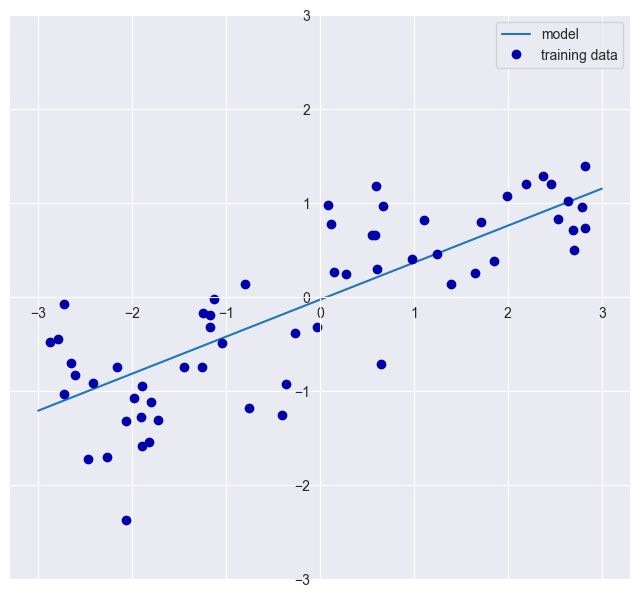

In [27]:
mglearn.plots.plot_linear_regression_wave()

#### Линейная модель регрессии (метод наименьших квадратов)

In [28]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

In [29]:
print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))

lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746


In [30]:
print("Правильность на обучающем наборе: {:.2f}".format(lr.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.2f}".format(lr.score(X_test, y_test)))

Правильность на обучающем наборе: 0.67
Правильность на тестовом наборе: 0.66


#### Гребневая регрессия

In [36]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train, y_train)

print("Правильность на обучающем наборе: {:.2f}".format(ridge.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.2f}".format(ridge.score(X_test, y_test)))

Правильность на обучающем наборе: 0.67
Правильность на тестовом наборе: 0.66


In [37]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Правильность на обучающем наборе: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.2f}".format(ridge10.score(X_test, y_test)))


Правильность на обучающем наборе: 0.67
Правильность на тестовом наборе: 0.64


In [38]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Правильность на обучающем наборе: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.2f}".format(ridge01.score(X_test, y_test)))

Правильность на обучающем наборе: 0.67
Правильность на тестовом наборе: 0.66


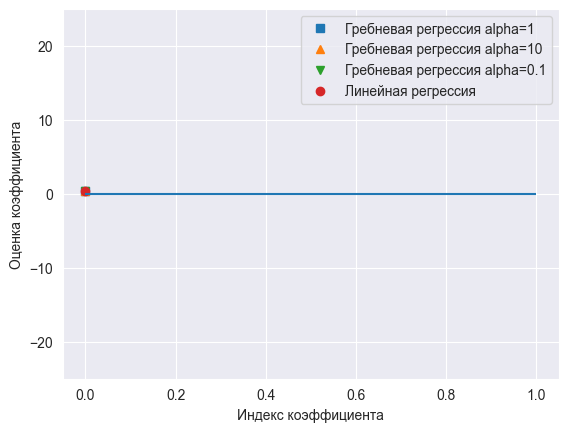

In [39]:
plt.plot(ridge.coef_, 's', label="Гребневая регрессия alpha=1")
plt.plot(ridge10.coef_, '^', label="Гребневая регрессия alpha=10")
plt.plot(ridge01.coef_, 'v', label="Гребневая регрессия alpha=0.1")
plt.plot(lr.coef_, 'o', label="Линейная регрессия")
plt.xlabel("Индекс коэффициента")
plt.ylabel("Оценка коэффициента")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()
plt.show()

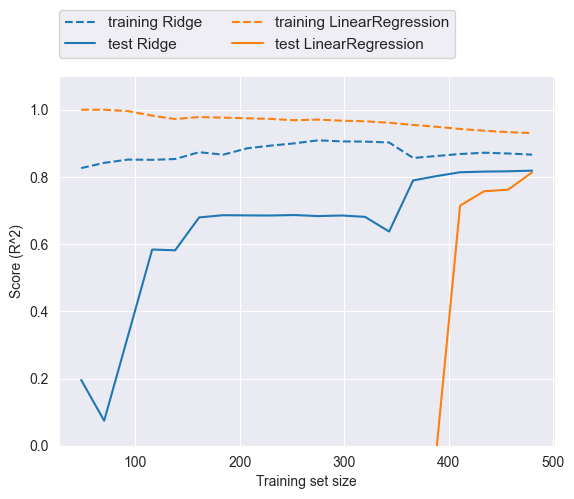

In [40]:
mglearn.plots.plot_ridge_n_samples()

#### Лассо

In [41]:
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train, y_train)

print("Правильность на обучающем наборе: {:.2f}".format(lasso.score(X_train, y_train)))
print("Правильность на контрольном наборе: {:.2f}".format(lasso.score(X_test, y_test)))
print("Количество использованных признаков: {}".format(np.sum(lasso.coef_ != 0)))


Правильность на обучающем наборе: 0.29
Правильность на контрольном наборе: 0.24
Количество использованных признаков: 1


In [42]:
# мы увеличиваем значение "max_iter",
# иначе модель выдаст предупреждение, что нужно увеличить max_iter.
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)

print("Правильность на обучающем наборе: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Количество использованных признаков: {}".format(np.sum(lasso001.coef_ != 0)))


Правильность на обучающем наборе: 0.67
Правильность на тестовом наборе: 0.66
Количество использованных признаков: 1


In [43]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)

print("Правильность на обучающем наборе: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Количество использованных признаков: {}".format(np.sum(lasso00001.coef_ != 0)))


Правильность на обучающем наборе: 0.67
Правильность на тестовом наборе: 0.66
Количество использованных признаков: 1


Text(0, 0.5, 'Оценка коэффициента')

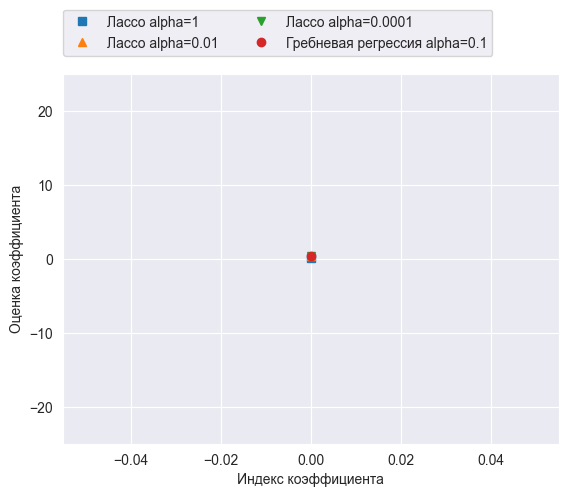

In [44]:
plt.plot(lasso.coef_, 's', label="Лассо alpha=1")
plt.plot(lasso001.coef_, '^', label="Лассо alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Лассо alpha=0.0001")
plt.plot(ridge01.coef_, 'o', label="Гребневая регрессия alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Индекс коэффициента")
plt.ylabel("Оценка коэффициента")


#### Линейные модели для классификации

$$
\hat{y} = w[0] \cdot x[0] + w[1] \cdot x[1] + \dots + w[p] \cdot x[p] + b > 0
$$


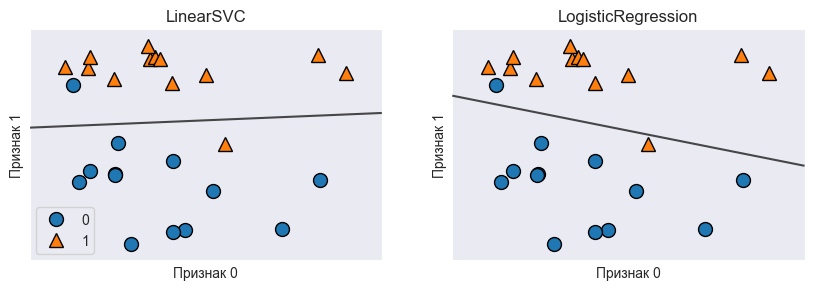

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
X, y = mglearn.datasets.make_forge()
fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("Признак 0")
    ax.set_ylabel("Признак 1")
axes[0].legend()


#### Построение модели LogisticRegression

In [47]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42
)

logreg = LogisticRegression().fit(X_train, y_train)
print("Правильность на обучающем наборе: {:.3f}".format(logreg.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(logreg.score(X_test, y_test)))


Правильность на обучающем наборе: 0.955
Правильность на тестовом наборе: 0.951


C:\Users\Sergey\PycharmProjects\BigData\venv\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [48]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("Правильность на обучающем наборе: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(logreg100.score(X_test, y_test)))

Правильность на обучающем наборе: 0.944
Правильность на тестовом наборе: 0.965


C:\Users\Sergey\PycharmProjects\BigData\venv\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [49]:
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("Правильность на обучающем наборе: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(logreg001.score(X_test, y_test)))

Правильность на обучающем наборе: 0.934
Правильность на тестовом наборе: 0.930


C:\Users\Sergey\PycharmProjects\BigData\venv\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


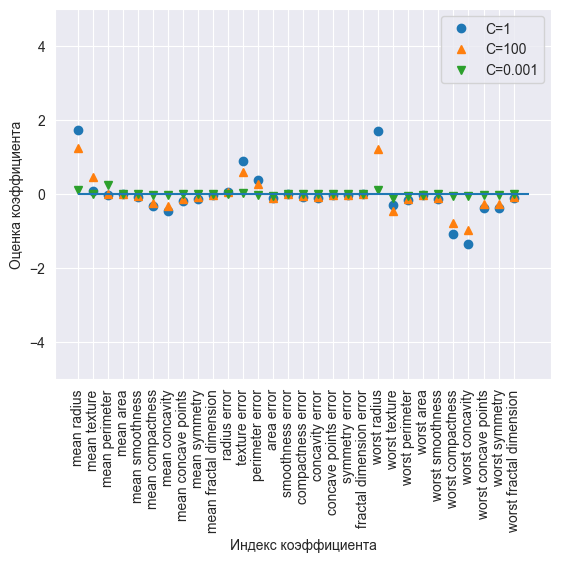

In [50]:
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5, 5)
plt.xlabel("Индекс коэффициента")
plt.ylabel("Оценка коэффициента")
plt.legend()

# Задание

### Подключение датасетов моделей регрессии

### 1. Набор данных диабета (регрессия)

In [73]:
from sklearn.datasets import load_diabetes
diabetes_data = load_diabetes()

In [74]:
diabetes_data.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [75]:
diabetes_data.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [76]:
diabetes_data.data

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]])

In [77]:
print(f"Форма миссива data: \n{diabetes_data['data'].shape}")

Форма миссива data: 
(442, 10)


In [78]:
print(f"Форма массива target: \n{diabetes_data['target'].shape}")

Форма массива target: 
(442,)


In [79]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(diabetes_data['data'], diabetes_data['target'], random_state=42)

In [80]:
print(f"Форма массива x_train: {x_train.shape}")
print(f"Форма массива y_train: {y_train.shape}")

Форма массива x_train: (331, 10)
Форма массива y_train: (331,)


In [81]:
print(f"Форма массива x_test: {x_test.shape}")
print(f"Форма массива y_test: {y_test.shape}")

Форма массива x_test: (111, 10)
Форма массива y_test: (111,)


#### Построение модели регрессии

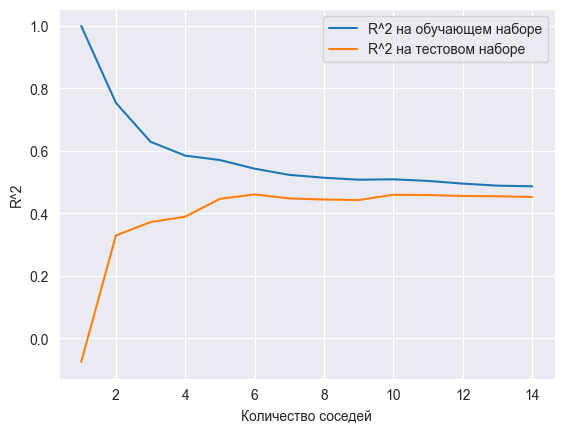

In [86]:
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsRegressor

training_accuracy = []
test_accuracy = []

neighbors_settings = range(1, 15)

for n_neighbors in neighbors_settings:
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(x_train, y_train)
    training_accuracy.append(reg.score(x_train, y_train))
    test_accuracy.append(reg.score(x_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label="R^2 на обучающем наборе")
plt.plot(neighbors_settings, test_accuracy, label="R^2 на тестовом наборе")
plt.ylabel("R^2")
plt.xlabel("Количество соседей")
plt.legend()
plt.show()

#### KNeighborsRegressor

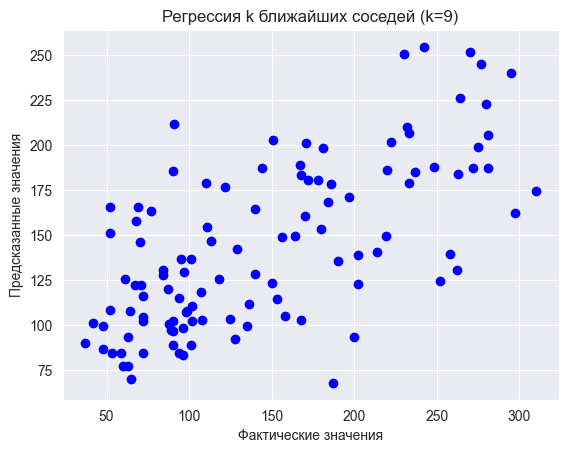

Среднеквадратичное отклонение (MSE): 3082.080524969414


In [91]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': [3, 5, 7, 9]}
knn = KNeighborsRegressor()
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(x_train, y_train)

best_n_neighbors = grid_search.best_params_['n_neighbors']

regressor = KNeighborsRegressor(n_neighbors=best_n_neighbors)
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
mse = np.mean((y_pred - y_test) ** 2)

plt.scatter(y_test, y_pred, color='b')
plt.xlabel("Фактические значения")
plt.ylabel("Предсказанные значения")
plt.title(f"Регрессия k ближайших соседей (k={best_n_neighbors})")
plt.show()

print(f"Среднеквадратичное отклонение (MSE): {mse}")

#### LinearRegression

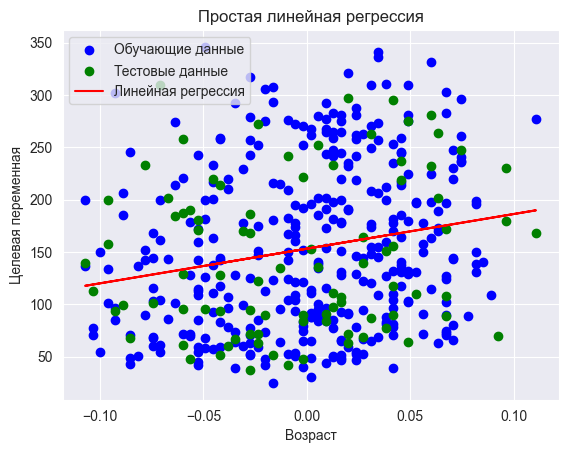

Среднеквадратичное отклонение (MSE) на тестовом наборе: 5254.231976236004


In [95]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

X_age = diabetes_data.data[:, 0].reshape(-1, 1)
y = diabetes_data.target

X_train, X_test, y_train, y_test = train_test_split(X_age, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

predictions_train = model.predict(X_train)
predictions_test = model.predict(X_test)

plt.scatter(X_train, y_train, color='b', label='Обучающие данные')
plt.scatter(X_test, y_test, color='g', label='Тестовые данные')
plt.plot(X_age, model.predict(X_age), color='r', label='Линейная регрессия')
plt.xlabel("Возраст")
plt.ylabel("Целевая переменная")
plt.title("Простая линейная регрессия")
plt.legend()
plt.show()

mse = np.mean((predictions_test - y_test) ** 2)
print(f"Среднеквадратичное отклонение (MSE) на тестовом наборе: {mse}")


#### Ridge

Правильность на обучающем наборе: 0.52
Правильность на тестовом наборе: 0.46


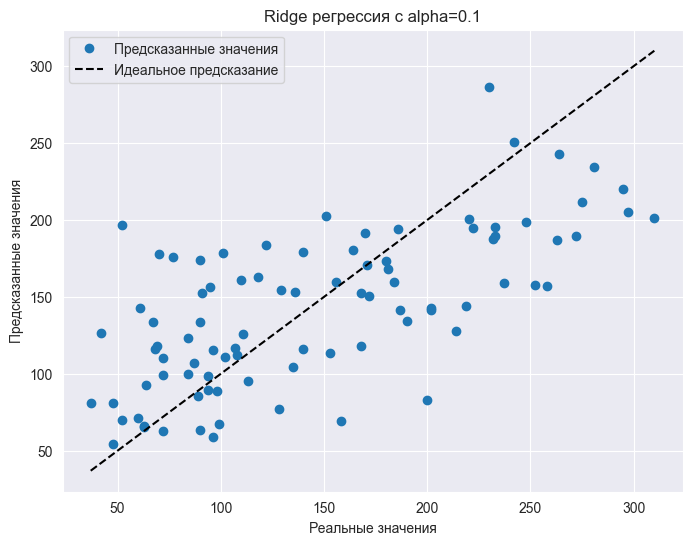

In [99]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split, GridSearchCV

param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}
ridge = Ridge()
X_train, X_test, y_train, y_test = train_test_split(diabetes_data.data, diabetes_data.target, test_size=0.2, random_state=42)
grid_search = GridSearchCV(ridge, param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_alpha = grid_search.best_params_['alpha']

ridge = Ridge(alpha=best_alpha)
ridge.fit(X_train, y_train)

y_pred = ridge.predict(X_test)

train_score = ridge.score(X_train, y_train)
test_score = ridge.score(X_test, y_test)

print(f"Правильность на обучающем наборе: {train_score:.2f}")
print(f"Правильность на тестовом наборе: {test_score:.2f}")

plt.figure(figsize=(8, 6))
plt.plot(y_test, y_pred, 'o', label="Предсказанные значения")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', label="Идеальное предсказание")
plt.xlabel("Реальные значения")
plt.ylabel("Предсказанные значения")
plt.title(f"Ridge регрессия с alpha={best_alpha}")
plt.legend()
plt.show()

#### Lasso

Оценка на обучающем наборе: 0.52
Оценка на тестовом наборе: 0.47


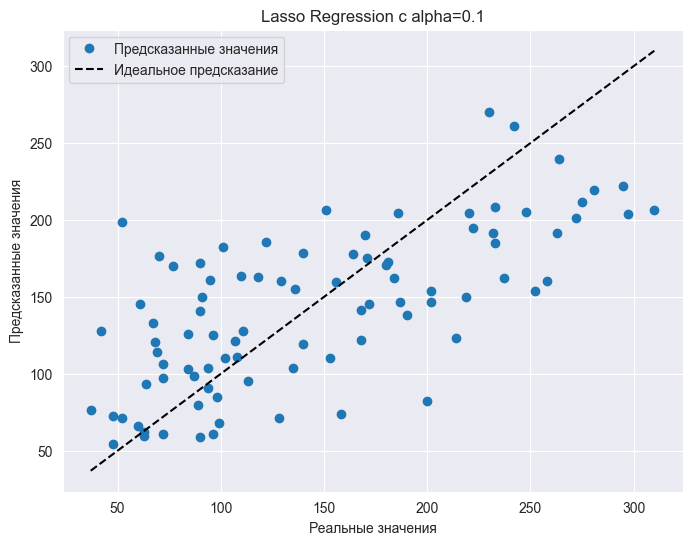

In [101]:
from sklearn.linear_model import Lasso
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}

lasso = Lasso()
X_train, X_test, y_train, y_test = train_test_split(diabetes_data.data, diabetes_data.target, test_size=0.2, random_state=42)
grid_search = GridSearchCV(lasso, param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_alpha = grid_search.best_params_['alpha']

lasso = Lasso(alpha=best_alpha)

lasso.fit(X_train, y_train)

print("Оценка на обучающем наборе: {:.2f}".format(lasso.score(X_train, y_train)))
print("Оценка на тестовом наборе: {:.2f}".format(lasso.score(X_test, y_test)))


y_pred = lasso.predict(X_test)

plt.figure(figsize=(8, 6))
plt.plot(y_test, y_pred, 'o', label="Предсказанные значения")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', label="Идеальное предсказание")
plt.xlabel("Реальные значения")
plt.ylabel("Предсказанные значения")
plt.title(f"Lasso Regression с alpha={best_alpha}")
plt.legend()
plt.show()


### LogisticRegression

In [123]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
X, y = diabetes_data.data, (diabetes_data.target > 140).astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)

train_accuracy = logistic_regression.score(X_train, y_train)
test_accuracy = logistic_regression.score(X_test, y_test)

print("Точность на обучающем наборе: {:.2f}".format(train_accuracy))
print("Точность на тестовом наборе: {:.2f}".format(test_accuracy))

Точность на обучающем наборе: 0.76
Точность на тестовом наборе: 0.72


## Анализ результатов моделей на датасете `diabetes_data`

### KNeighborsRegressor
Модель K ближайших соседей показала среднеквадратичное отклонение (MSE) в размере 3082.08 на тестовом наборе данных. Эта ошибка считается относительно высокой, поэтому может быть полезно рассмотреть альтернативные модели или настроить параметры для улучшения предсказаний.

### LinearRegression
Линейная регрессия демонстрирует более высокое MSE на тестовом наборе данных, равное 5254.23. Это может указывать на то, что линейная модель не подходит для данного датасета. Возможно, требуется использование более сложной модели или проведение предварительной обработки данных для улучшения точности предсказаний.

### Ridge
Модель Ridge регрессии показала коэффициент детерминации 0.52 на обучающем наборе и 0.46 на тестовом. Эти значения указывают на среднюю производительность модели. Вероятно, настройка параметров регуляризации или выбор другой модели может привести к улучшению результатов.

### Lasso
Модель Lasso регрессии имеет коэффициент детерминации 0.52 на обучающем наборе и 0.47 на тестовом. Такое небольшое снижение точности на тестовом наборе может свидетельствовать о переобучении на обучающих данных. Возможно, стоит рассмотреть более слабую регуляризацию или другие модели, чтобы повысить обобщающую способность модели.

### LogisticRegression
Для задачи бинарной классификации с Logistic Regression точность модели составляет 0.76 на обучающем и 0.72 на тестовом наборе данных. Это может указывать на хорошую предсказательную способность модели, но также важно обеспечить баланс между точностью и обобщающей способностью, чтобы избежать переобучения.


### 2. Набор данных linnerud

In [102]:
from sklearn.datasets import load_linnerud

linnerud_data = load_linnerud()

In [103]:
linnerud_data.feature_names

['Chins', 'Situps', 'Jumps']

In [104]:
print(f"Ключи linnerud_data: \n{linnerud_data.keys()}")

Ключи linnerud_data: 
dict_keys(['data', 'feature_names', 'target', 'target_names', 'frame', 'DESCR', 'data_filename', 'target_filename', 'data_module'])


In [105]:
linnerud_data.data

array([[  5., 162.,  60.],
       [  2., 110.,  60.],
       [ 12., 101., 101.],
       [ 12., 105.,  37.],
       [ 13., 155.,  58.],
       [  4., 101.,  42.],
       [  8., 101.,  38.],
       [  6., 125.,  40.],
       [ 15., 200.,  40.],
       [ 17., 251., 250.],
       [ 17., 120.,  38.],
       [ 13., 210., 115.],
       [ 14., 215., 105.],
       [  1.,  50.,  50.],
       [  6.,  70.,  31.],
       [ 12., 210., 120.],
       [  4.,  60.,  25.],
       [ 11., 230.,  80.],
       [ 15., 225.,  73.],
       [  2., 110.,  43.]])

In [106]:
print(f"Форма миссива data: \n{linnerud_data['data'].shape}")

Форма миссива data: 
(20, 3)


In [107]:
print(f"Форма массива target: \n{linnerud_data['target'].shape}")

Форма массива target: 
(20, 3)


In [108]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(linnerud_data['data'], linnerud_data['target'], random_state=42)

In [114]:
print(f"Форма массива x_train: {X_train.shape}")
print(f"Форма массива y_train: {y_train.shape}")

Форма массива x_train: (15, 3)
Форма массива y_train: (15, 3)


In [115]:
print(f"Форма массива x_test: {X_test.shape}")
print(f"Форма массива y_test: {y_test.shape}")

Форма массива x_test: (5, 3)
Форма массива y_test: (5, 3)


#### Построение модели регрессии

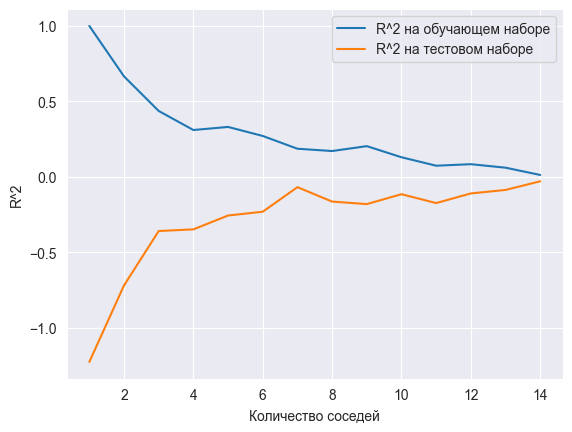

In [116]:
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsRegressor


training_accuracy = []
test_accuracy = []

neighbors_settings = range(1, 15)

for n_neighbors in neighbors_settings:

    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    training_accuracy.append(reg.score(X_train, y_train))
    test_accuracy.append(reg.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label="R^2 на обучающем наборе")
plt.plot(neighbors_settings, test_accuracy, label="R^2 на тестовом наборе")
plt.ylabel("R^2")
plt.xlabel("Количество соседей")
plt.legend()
plt.show()


#### KNeighborsRegressor

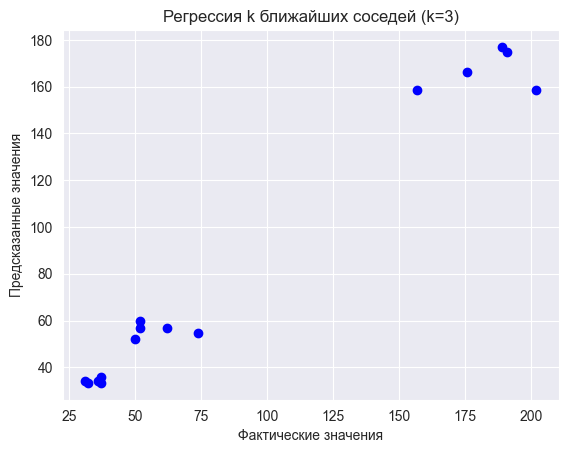

Среднеквадратичное отклонение (MSE): 192.98518518518523


In [117]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': [3, 5, 7, 9]}
knn = KNeighborsRegressor()
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_n_neighbors = grid_search.best_params_['n_neighbors']

regressor = KNeighborsRegressor(n_neighbors=best_n_neighbors)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
mse = np.mean((y_pred - y_test) ** 2)

plt.scatter(y_test, y_pred, color='b')
plt.xlabel("Фактические значения")
plt.ylabel("Предсказанные значения")
plt.title(f"Регрессия k ближайших соседей (k={best_n_neighbors})")
plt.show()

print(f"Среднеквадратичное отклонение (MSE): {mse}")


### LinearRegression

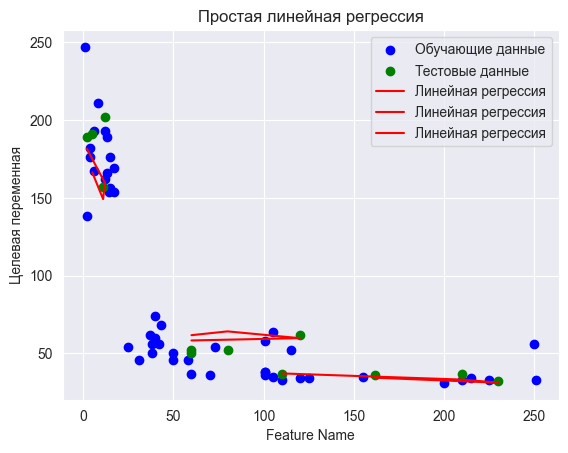

Среднеквадратичное отклонение (MSE) на тестовом наборе: 239.15367187682764


In [118]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

feature_index = 0

X_train, X_test, y_train, y_test = train_test_split(linnerud_data.data, linnerud_data.target, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

predictions_train = model.predict(X_train)
predictions_test = model.predict(X_test)

plt.scatter(X_train, y_train, color='b', label='Обучающие данные')
plt.scatter(X_test, y_test, color='g', label='Тестовые данные')
plt.plot(X_test, predictions_test, color='r', label='Линейная регрессия')
plt.xlabel("Feature Name")  # Replace with the name of the feature you've selected
plt.ylabel("Целевая переменная")
plt.title("Простая линейная регрессия")
plt.legend()
plt.show()

mse = mean_squared_error(y_test, predictions_test)
print(f"Среднеквадратичное отклонение (MSE) на тестовом наборе: {mse}")

### Ridge

Правильность на обучающем наборе: 0.37
Правильность на тестовом наборе: -1.13


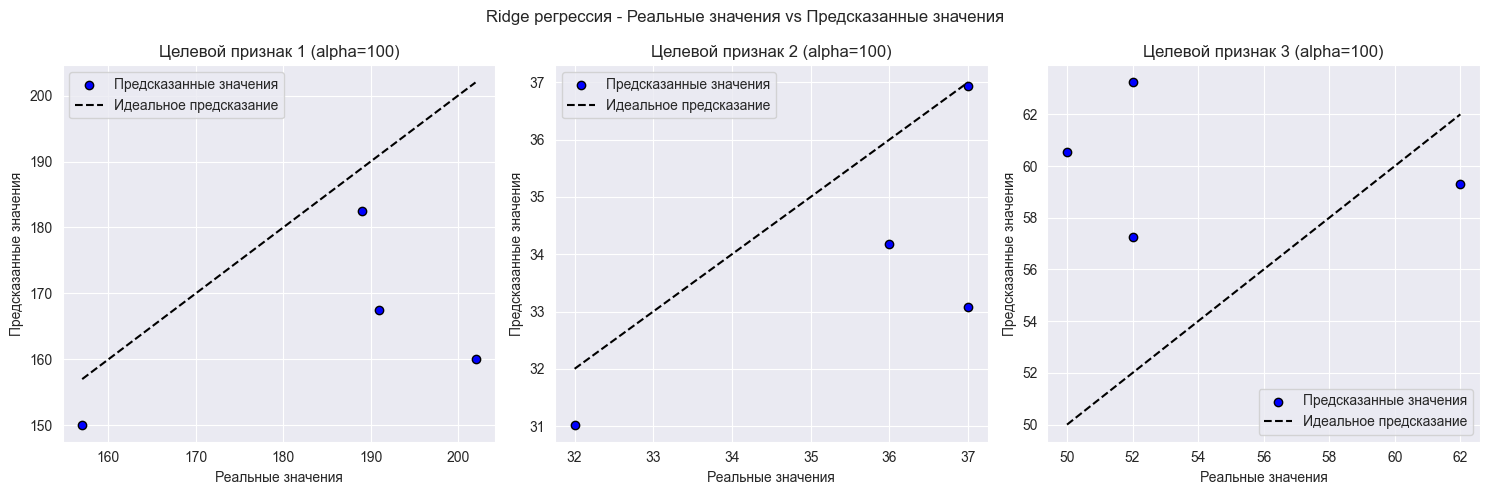

In [120]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split, GridSearchCV

param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}

ridge = Ridge()

X_train, X_test, y_train, y_test = train_test_split(linnerud_data.data, linnerud_data.target, test_size=0.2, random_state=42)

grid_search = GridSearchCV(ridge, param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_alpha = grid_search.best_params_['alpha']

ridge = Ridge(alpha=best_alpha)
ridge.fit(X_train, y_train)

y_pred = ridge.predict(X_test)

train_score = ridge.score(X_train, y_train)
test_score = ridge.score(X_test, y_test)

print(f"Правильность на обучающем наборе: {train_score:.2f}")
print(f"Правильность на тестовом наборе: {test_score:.2f}")

y_pred = ridge.predict(X_test)

fig, axes = plt.subplots(1, y_test.shape[1], figsize=(15, 5))

for i in range(y_test.shape[1]):
    axes[i].scatter(y_test[:, i], y_pred[:, i], label="Предсказанные значения", color="blue", edgecolor="k")
    axes[i].plot([y_test[:, i].min(), y_test[:, i].max()], [y_test[:, i].min(), y_test[:, i].max()], 'k--', label="Идеальное предсказание")
    axes[i].set_xlabel("Реальные значения")
    axes[i].set_ylabel("Предсказанные значения")
    axes[i].set_title(f"Целевой признак {i+1} (alpha={best_alpha})")
    axes[i].legend()

plt.suptitle("Ridge регрессия - Реальные значения vs Предсказанные значения")
plt.tight_layout()
plt.show()


### Lasso

Оценка на обучающем наборе: 0.19
Оценка на тестовом наборе: -0.31


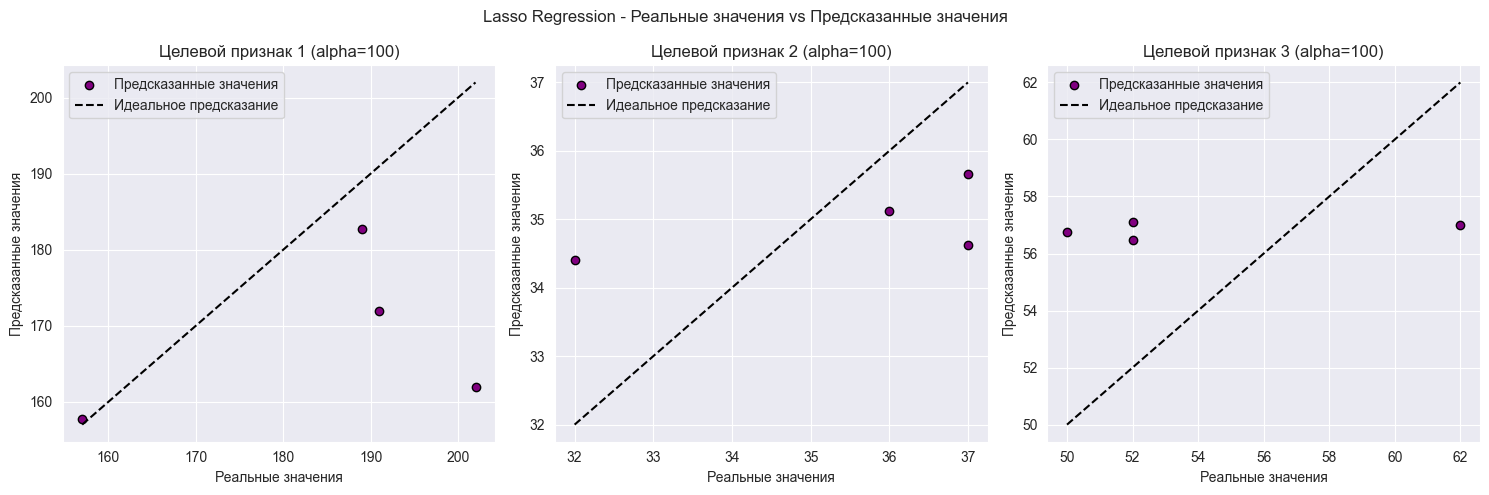

In [122]:
from sklearn.linear_model import Lasso
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}

lasso = Lasso()
X_train, X_test, y_train, y_test = train_test_split(linnerud_data.data, linnerud_data.target, test_size=0.2, random_state=42)
grid_search = GridSearchCV(lasso, param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_alpha = grid_search.best_params_['alpha']

lasso = Lasso(alpha=best_alpha)

lasso.fit(X_train, y_train)

print("Оценка на обучающем наборе: {:.2f}".format(lasso.score(X_train, y_train)))
print("Оценка на тестовом наборе: {:.2f}".format(lasso.score(X_test, y_test)))

y_pred = lasso.predict(X_test)

fig, axes = plt.subplots(1, y_test.shape[1], figsize=(15, 5))

for i in range(y_test.shape[1]):
    axes[i].scatter(y_test[:, i], y_pred[:, i], label="Предсказанные значения", color="purple", edgecolor="k")
    axes[i].plot([y_test[:, i].min(), y_test[:, i].max()], [y_test[:, i].min(), y_test[:, i].max()], 'k--', label="Идеальное предсказание")
    axes[i].set_xlabel("Реальные значения")
    axes[i].set_ylabel("Предсказанные значения")
    axes[i].set_title(f"Целевой признак {i+1} (alpha={best_alpha})")
    axes[i].legend()

plt.suptitle("Lasso Regression - Реальные значения vs Предсказанные значения")
plt.tight_layout()
plt.show()

#### LogisticRegression

Точность на обучающем наборе: 0.44
Точность на тестовом наборе: 0.00


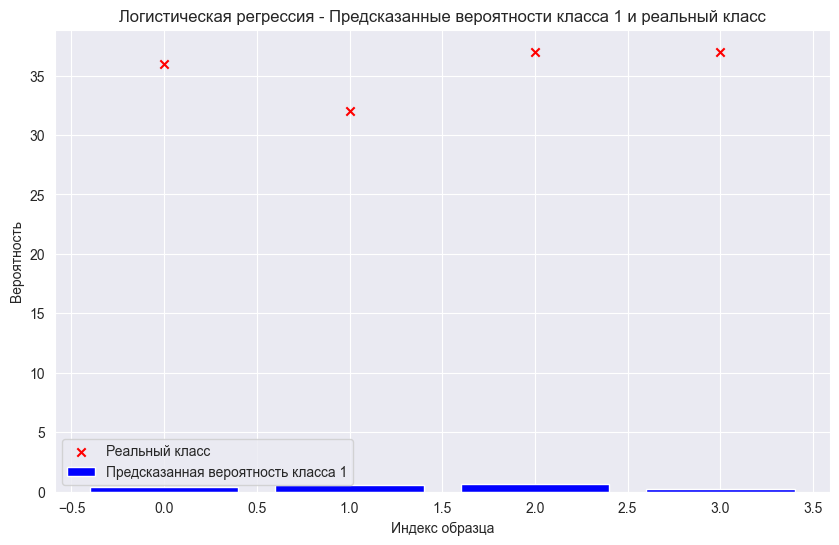

In [124]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(linnerud_data.data, linnerud_data.target[:, 1], test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)

train_accuracy = logistic_regression.score(X_train, y_train)
test_accuracy = logistic_regression.score(X_test, y_test)

print("Точность на обучающем наборе: {:.2f}".format(train_accuracy))
print("Точность на тестовом наборе: {:.2f}".format(test_accuracy))

y_pred_proba = logistic_regression.predict_proba(X_test)

plt.figure(figsize=(10, 6))
plt.bar(range(len(y_test)), y_pred_proba[:, 1], color='blue', label="Предсказанная вероятность класса 1")
plt.scatter(range(len(y_test)), y_test, color='red', label="Реальный класс", marker='x')
plt.xlabel("Индекс образца")
plt.ylabel("Вероятность")
plt.title("Логистическая регрессия - Предсказанные вероятности класса 1 и реальный класс")
plt.legend()
plt.show()

## Анализ результатов моделей на датасете `linnerud_data`

### KNeighborsRegressor
Среднеквадратичное отклонение (MSE) составляет примерно 192.98. Модель KNeighborsRegressor показывает низкое MSE, что свидетельствует о хорошей предсказательной способности для данного датасета.

### LinearRegression
MSE на тестовом наборе данных составляет примерно 239.15. Модель LinearRegression также демонстрирует хорошую предсказательную способность, хотя MSE немного выше, чем у KNeighborsRegressor

### Ridge
Правильность на обучающем наборе составляет примерно 0.37, а на тестовом -1.13. Отрицательная правильность на тестовом наборе может указывать на несоответствие модели данному датасету, что может быть вызвано недостаточной сложностью модели для данной задачи или неподходящими параметрами.

### Lasso
Оценка на обучающем наборе данных составляет примерно 0.19, а на тестовом -0.31. Низкая оценка на тестовом наборе может свидетельствовать о том, что модель Lasso недостаточно хорошо подходит для данного датасета и требует дополнительной настройки или другой регуляризации.

### LogisticRegression
Точность на обучающем наборе составляет примерно 0.44, а на тестовом — 0.00. Модель LogisticRegression не подходит для задачи регрессии, поскольку её точность на тестовом наборе равна нулю, что указывает на несоответствие модели задаче регрессии.

Исходя из этих результатов, можно сделать вывод, что модели `KNeighborsRegressor` и `LinearRegression` показывают лучшую производительность для задачи регрессии с датасетом `linnerud_data`. Модели `Ridge`, `Lasso` и `LogisticRegression` требуют дополнительной настройки или, возможно, использования другого подхода для улучшения их производительности.